# Исследовательский анализ данных о продажах компьютерных игр

**Ситуация:**

Из открытых источников доступны исторические данные о продажах игр до 2016 года, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Представим, что сейчас декабрь 2016 г., планируется рекламная кампанию на 2017-й. 

**Цель:**
Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Общая информация о данных

In [1]:
#импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings #убрать предупреждения 
warnings.simplefilter("ignore")


from scipy import stats as st

In [2]:
#загружаем датасет

try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
except:
    data = pd.read_csv('/Users/Taras/Documents/я-практикум/data/data/games.csv')
pd.set_option('display.max_columns', None)  #показать все столбцы таблицы


In [3]:
#изучем первые 20 строк 

data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# посмотрим информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Измененим регистр в названиях столбцов

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.info() #проверим результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
# проверим явные дубликаты
data.duplicated().sum()

0

In [8]:
#Колличество пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
#оценим их в процентах
data.isna().sum()/data.shape[0]*100


name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

В результате предварительного анализа, мы вяснили, что для работы с данными необходимо:
1. Привести названия столбцов к нижнему регистру
2. Изменить тип данных в Year_of_Release на int, тк там указан год выхода и это цело число
3. изменить тип данных в User_Score на float64, тк для операций с этими данными нам необходимо, чтобы рейтинг имел числовой тип.  




## Предобработка данных

### Название игры

Посмотрим две строки, где отсутствует название игры. 

In [10]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Стоит обратить внимание, что пропуски в name и genre находятся в одних и тех же строках. Скорее всего данные повредились или не сохранились - это 1993 год. Мы можем удалить эти строки. Это не повлияет на статистику. 

In [11]:
data = data.dropna(subset=['name']) 
data['name'].isna().sum()  

0

In [12]:
data['genre'].isna().sum()

0

### Год релиза


Необходимо перевести тип данных year_of_release, но в этом столбце имеются пропуски. Т.к.пропусков всего 1,6% мы можем удалить эти строки 

In [13]:
data = data.dropna(subset=['year_of_release']) 
data['year_of_release'].isna().sum()  

0

In [14]:
data['year_of_release'] = data['year_of_release'].astype('int')


### Оценка пользователей


Аналогично, в user_score есть пропуски, но их слишком много. Так же нам заранее известно, что в этом столбце встречаются значения tbd.

"tbd" - To Be Determined, этот термин используется, если какая-то информация еще не определена или решение по вопросу не принято. В данном случае, скорее всего, в источнике не корректно вносили данные - иногда вносилили данные про игру, а тк для того, чтобы появился рейтинг игроков необходимо время, сначала помечали tbd, а затем просто забывали внести актуальные данные. 


Посмотрим эти данные. 


In [15]:
data[data['user_score'] == 'tbd'] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Закономерности почему могут отсутствовать данные нет. Вероятнее всего это просто отсутствие информации в источниках. 
Заменим tbd на NaN, что бы это не мешало нам анализировать данные. 

In [16]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = 'NaN'
data['user_score'] = data['user_score'].astype('float64')

    

### Пропуски 


Также пропуски встречаются в столбцах critic_score, user_score, rating. В каждом из столбцов более 40% пропусков. Заполнять медианным значением будет неккоректно. По этому мы их не будем трогать. 
Отсутствие данных можно объяснить несколькими причинами:
- Сайт-агрегатор отзывов мог просто еще не существовать, так например ESRB была основана в 1994, а Metacritic в 20001.
- Отсутствие данных - игре просто не присваивались какие-то из категорий
- Техническая ошибка

### Неявные дубликаты

Дополнительно проверим некоторые столбцы на наличие неявных дубликатов.

In [17]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Здесь все в порядке, есть названия отличающиеся одной цифрой или буквой, но это просто разные покаления.

In [18]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

Здесь тожде все ок. 

In [19]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Согласно статье в wikipedia категория 'K-A' в 1996 была переименована в 'E'. 
Cделаем 'E' и 'K-A' одной категорией.


In [20]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

### Добавление столбца с сумарными продажами

In [21]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### Итог 

In [22]:
(16715 - data.shape[0]) / 16715 * 100


1.6212982351181575

Мы удалили менее 2% базы, это не скажется на репрезентативности результатов. 
Остальные данные мы подготовили для дальнейшего анализа. 

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


# Исследовательский анализ данных

## Колличество выпускаемых игр в год

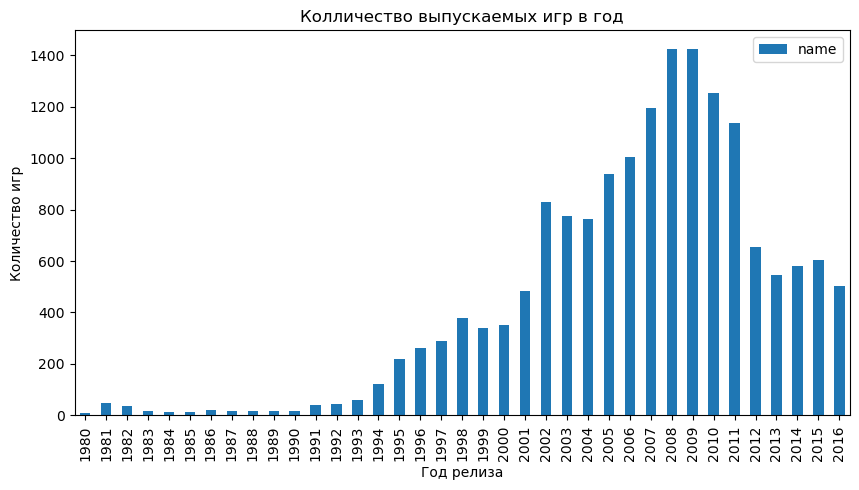

In [64]:
# составим сводную таблицу по колличеству выпускаемых игр в год 
(data
 .pivot_table(index='year_of_release',values='name',aggfunc='count')
 .plot( kind='bar', figsize = (10,5))
);
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
plt.title('Колличество выпускаемых игр в год')

plt.show();

Мы видим, что пик популярности видео-игр пришелся на 2008-2009 года, а потом интерес к ним стал падать. Это логично, так как в это время как раз появляется Android и iOS, смартфоны постепенно становятся все доступнне и появляется возможность играть на них, а не приобретать отдельное устройство. 



In [62]:
# Посмотрим сколько уникальных названий игр
data['name'].nunique()

11426

Ожидаемо много неуникальных названий игр - одна игра может выпускаться для разных платформ, и перевыпускаться нескольок раз. 

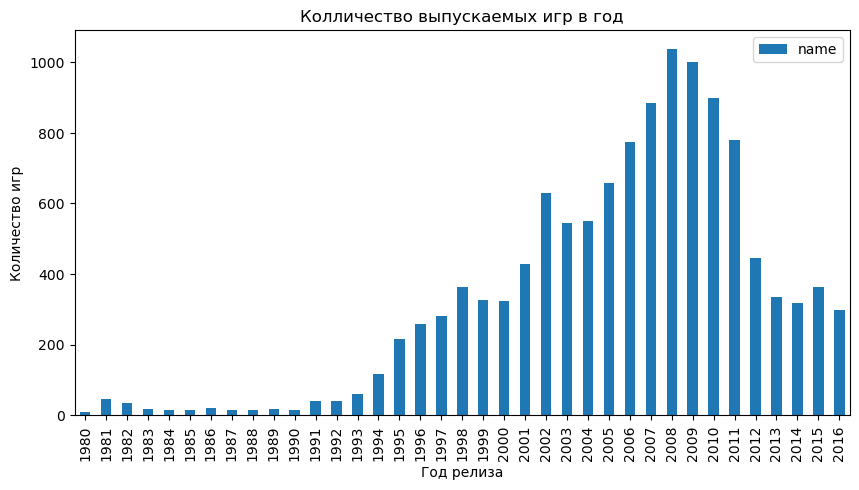

In [63]:
# Посмотрим динамику уникальных игр
(data
 .pivot_table(index='year_of_release',values='name',aggfunc=pd.Series.nunique)
 .plot( kind='bar', figsize = (10,5))
);
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
plt.title('Колличество выпускаемых игр в год')

plt.show();

График идентичен предыдущему, только значения с 2001 первого сократились примерно на 200-300, тк это пик популярности видео игр и все больше игр стали выпускать для всей линейки устройств.  

## Продажи по платформам

Сначала посмотрим колличество проданных игр по платформам за весь период. 

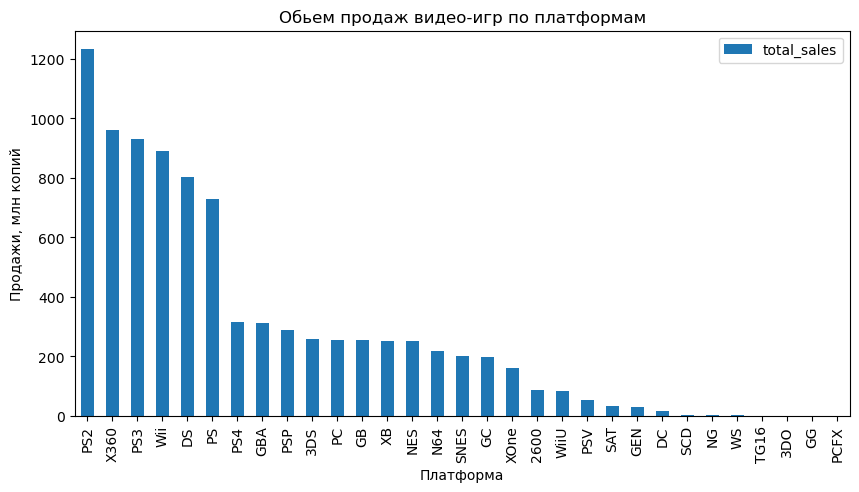

In [65]:
sales_info = data.pivot_table(index='platform', values='total_sales',aggfunc='sum')
sales_info.sort_values(by = 'total_sales', ascending=False ).plot( kind='bar', figsize = (10,5))
;

plt.xlabel('Платформа')
plt.ylabel('Продажи, млн копий')
plt.title('Обьем продаж видео-игр по платформам')
plt.show();

In [27]:
#Создадим список топ-10 платформ 

top_10_platform = ['PS2', 'DS', 'PS3', 'PS3', 'Wii', 'X360','PSP','PS','PC', 'GBA','XB' ,'GC','3DS' ]

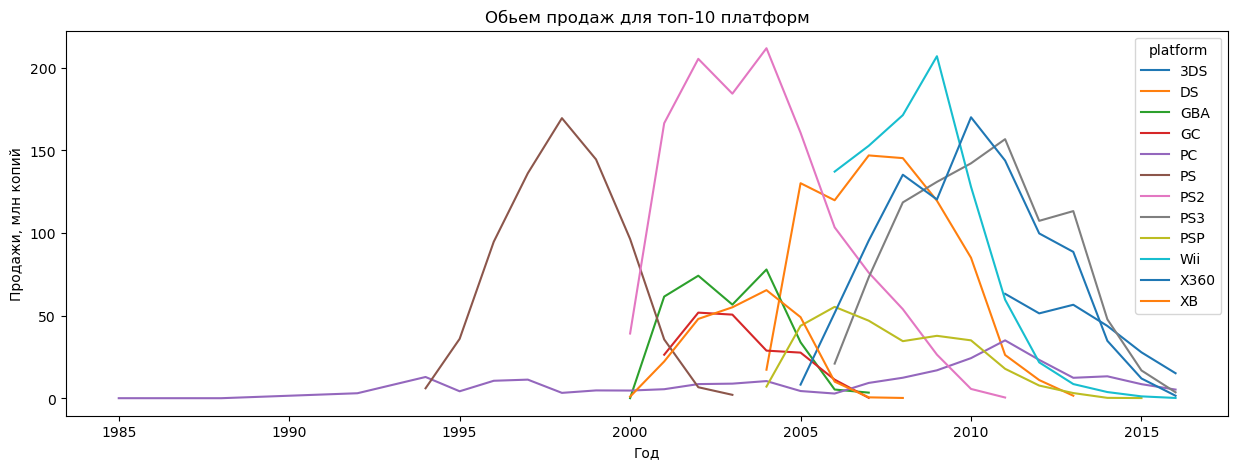

In [28]:
#построим граффик продаж для топ-10 платформ

data_top_10 = data.query('platform in @top_10_platform')

(data_top_10
 .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
 .plot(figsize=(15,5), style='-')
);    

plt.xlabel('Год')
plt.ylabel('Продажи, млн копий')
plt.title('Обьем продаж для топ-10 платформ')
plt.show()

Мы видим, что у каждой платформы есть свой срок жизни. В среднем это 10 лет. Особенно это хорошо видно для Play Station, так как в топ-10 вошли 3 покаления платыормы, то мы видим, как одно умирает, а следующее начинает набирать обороты. 

Распределение на граффике у всех платформ близко к нормальному, выделяется только PC. Это компьютеры.

Так же мы видим, что в 2013 - начале 2014 года падают показатели двух крупных игроков - Wii, XB. Вероятно появление новых версий платформ, которые мы не видим на этом графике. Аналогично с play station, судя по графикам PS, PS2, PS3 - новое покаление выпускают на спаде предыдущего 

## Выбор периода пля прогноза

В нашем исследовании мы будем рассматривать 2013-2016 год. 
За 2016 год, у нас не так много данных. 
2013 год мы берем, так как ранее предположили появление в этом году крупных игроков. 


In [29]:
#создадим новую выборку, с которой будем работать, после изучения продаж по платформам
actual_data = data.query('year_of_release >= 2013')
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int32  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 218.1+ KB


## Потенциально прибыльные платформ

Рассмотрим выбранный период 2014-2016 
Выясним, какие платформы появились недавно, какие еще в фазе роста

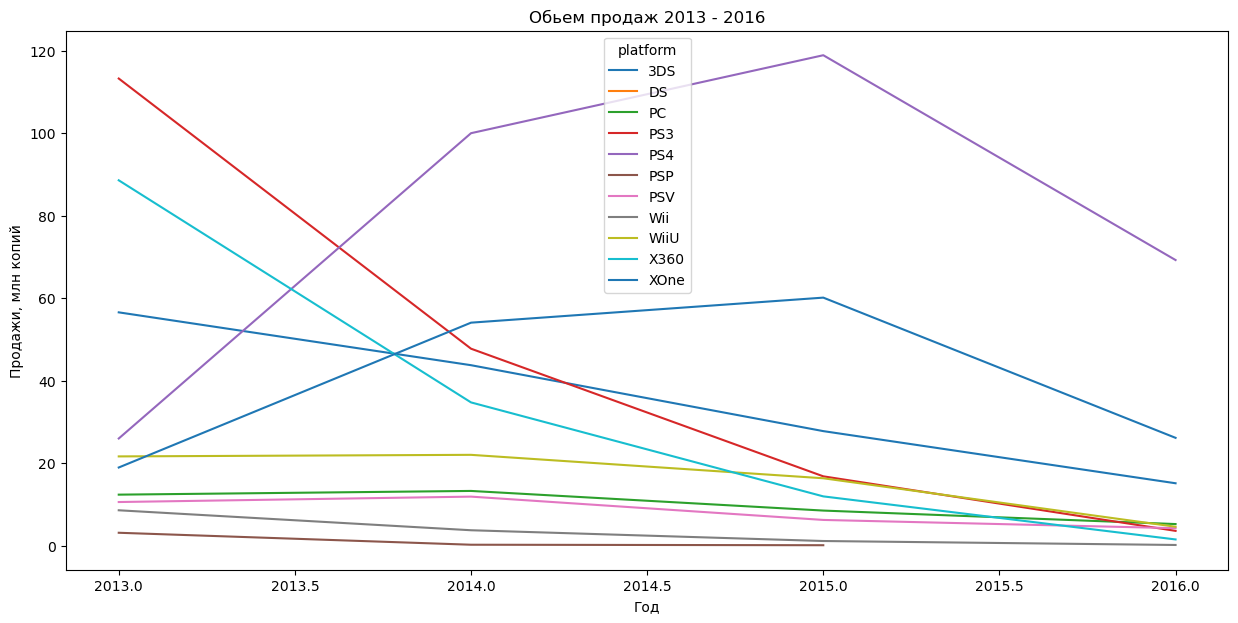

In [30]:
#Построим линейные диаграммы объема продаж по годам по каждой платформе, чтобы оценить динамику

(actual_data
.pivot_table(index='year_of_release', columns='platform', values='total_sales',aggfunc='sum')
.plot( figsize=(15, 7))
);


plt.xlabel('Год')
plt.ylabel('Продажи, млн копий')
plt.title('Обьем продаж 2013 - 2016')
plt.show()

**Выводы:**
* На графике видно 2 платформы из топ-10 - PS4 и XOne, обе 2013 года выпуска. Они уже достигли своего пика, но еще будут широко представленны на рынке.  
* Также еще остануться на рынке, но их доля не велика: PSV(портативная игровая консоль) , 3DS, WiiU ( обе от Nintendo). Их так же стоит рассмотреть, так как подобных продуктов, обычно своя целевая аудитория.  
* Платформы PS3, GBA, Wii, PSP в 2015-начале 2016 еще представленны, но уже потеряли актуальность.
* Как уже мы говорили выше, интерес к PC(компьютеры) стабилен - это тоже стоит учесть при планировании. 

## Ящики с усами

<Figure size 1200x1000 with 0 Axes>

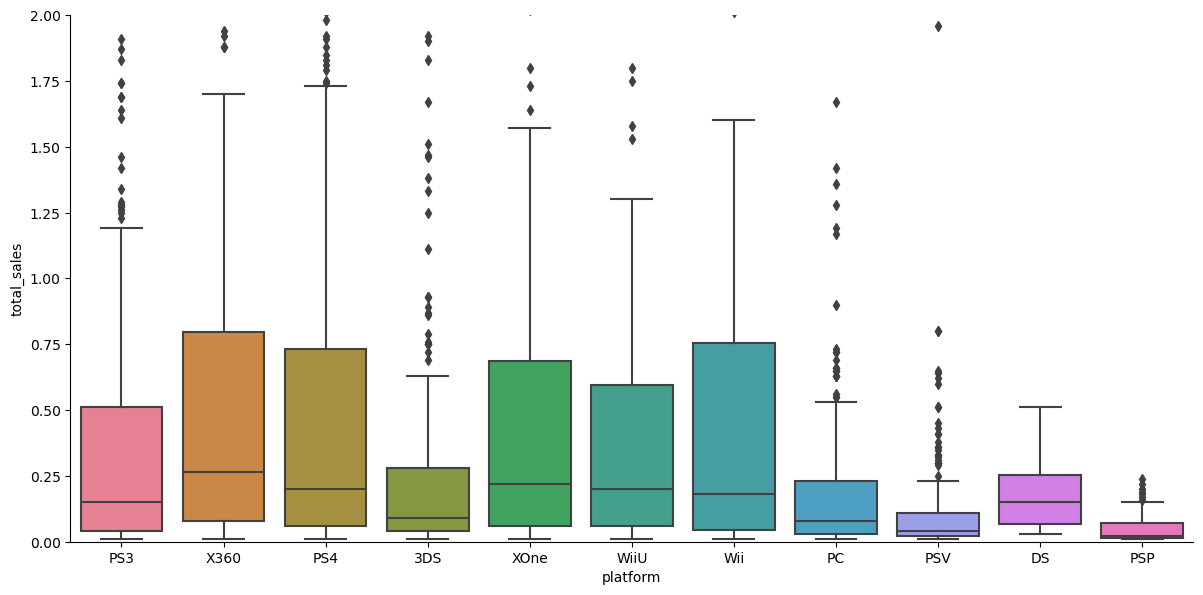

In [31]:
# анализируем данные за 2013 - 2016 год
plt.figure(figsize=(12,10))
sns.color_palette("husl", 9)

sns.catplot(data = actual_data,
           x='platform',
           y='total_sales',
           kind = 'box',
           orient='v',
           height=6,
           aspect = 2,
           palette="husl")
plt.ylim (0,2);

**Вывод**
* медиана расположена у всех платформ по-разному
* Больше всего продаж за период у Xbox 360, и это логично -  приставка имела несколько уникальных функций: поддерживала новый оригинальный контроллер  и имела доступ к играм через интернет
* Второе место у Wii, у Nintedo своя лояльная целевая аудиторя
* Далее идут PS4, XOne, WiiU - относительно "молодые" платформы



## Влияние отзывов пользователей и критиков на продажи

Проанализируем есть ли зависимость для PS4.

In [32]:
# отфильтруем данные по выбранной платформе
PS4 = actual_data.query('platform == "PS4"')
# оставим необходимые столбцы
PS4 = PS4[['total_sales', 'critic_score', 'user_score']]
#посчитаем кореляцию
PS4.corr()


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


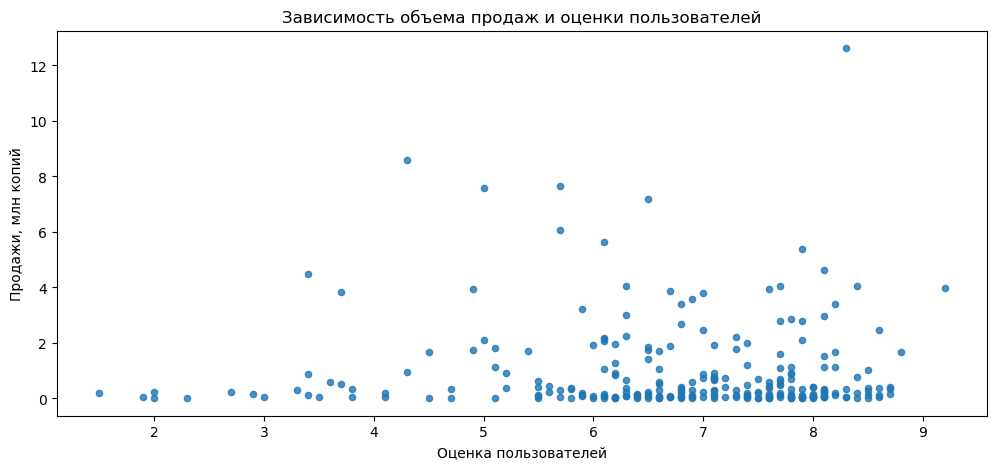

In [34]:
#построим диаграмму рассеивания, чтобы визуально оценить разброс оценок

PS4.plot(kind='scatter', x='user_score',y='total_sales',figsize=(12,5), alpha=0.8) 

plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн копий')
plt.title('Зависимость объема продаж и оценки пользователей')
plt.show();

**Вывод:** Для игр на Play Station 4  оценка пользователей не влияет на продажи. Связь между продажами и оценкой критиков есть, но слабая. 

Посмотрим корреляцию других платформ. 
Возьмем потенциально прибыльные платформы, которые мы определили в п.2.3:
XOne PSV 3DS, WiiU  PC

In [35]:
# Для XOne
actual_data.query('platform == "XOne"')[['total_sales', 'critic_score', 'user_score']].corr()



,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


In [36]:
# Для PSV
actual_data.query('platform == "PSV"')[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.254742,0.000942
critic_score,0.254742,1.000000,0.611521
user_score,0.000942,0.611521,1.000000


In [37]:
# Для 3DS
actual_data.query('platform == "3DS"')[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


In [38]:
# Для WiiU
actual_data.query('platform == "WiiU"')[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.376415,0.419330
critic_score,0.376415,1.000000,0.721313
user_score,0.419330,0.721313,1.000000


In [39]:
# Для PC
data.query('platform == "PC"')[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.257395,0.012905
critic_score,0.257395,1.000000,0.555199
user_score,0.012905,0.555199,1.000000


**Вывод:** для всех платформ наблюдается одинаковая закономерность: есть небольшая зависимоть продаж от рейтинга критиков, а вот отзывы пользователей практически не влияют. Исключение WiiU, там мнение игроков при покупке влияет чуть больше, чем мнение критиков. 

In [40]:
#создадим список перспективных платформ, и отфильтруем данные датасета по нему
perspectiv_platforms = ['XOne', 'PSV', '3DS', 'WiiU', 'PC' ]
perspectiv_data = actual_data.query('platform in @perspectiv_platforms')

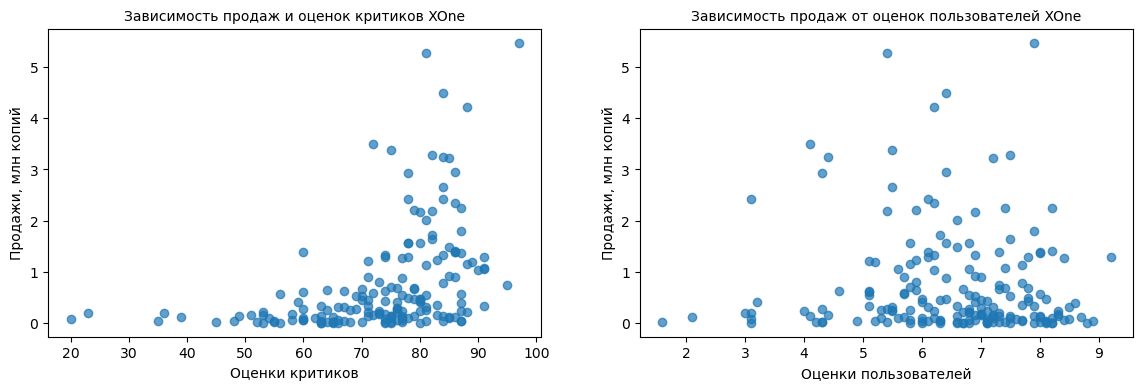

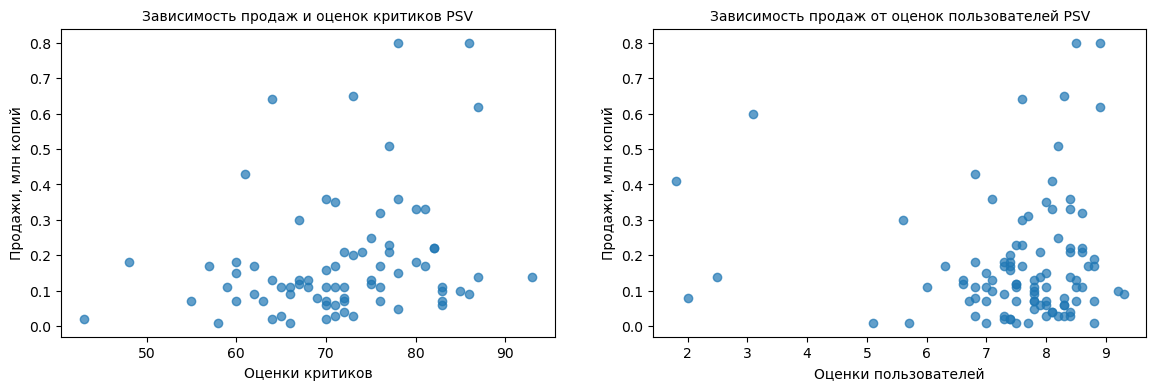

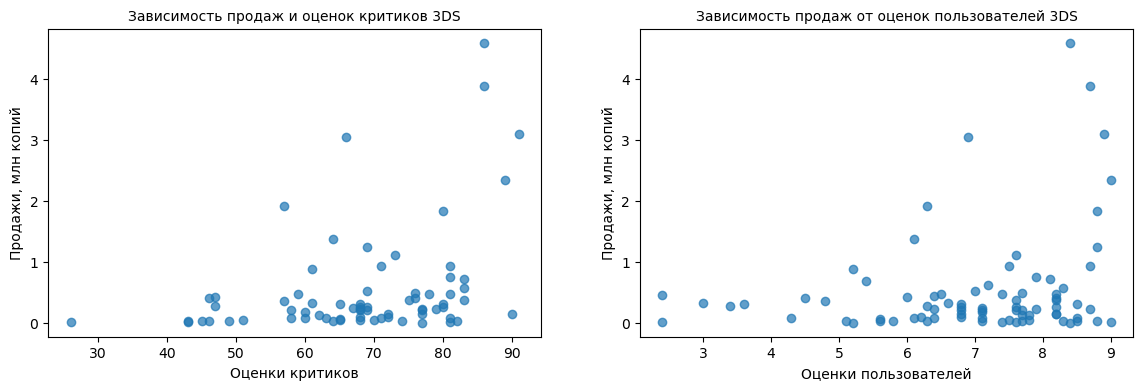

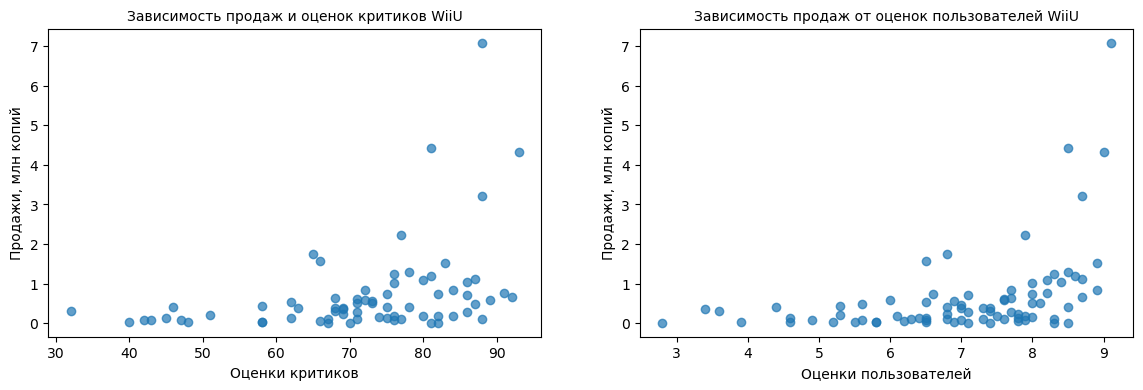

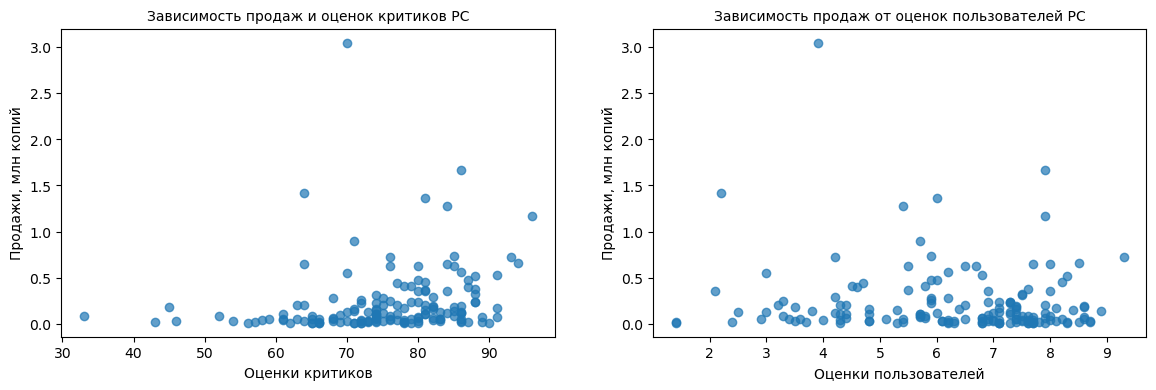

In [41]:
#https://pyprog.pro/mpl/mpl_main_components.html
# с помощью цикла построим пару графиков для каждой платформы

for platform in perspectiv_platforms:
    critic_score = perspectiv_data[perspectiv_data['platform']==platform]['critic_score']
    critic_sales = perspectiv_data[perspectiv_data['platform']==platform]['total_sales']
    
    user_score = perspectiv_data[perspectiv_data['platform']==platform]['user_score']
    user_sales = perspectiv_data[perspectiv_data['platform']==platform]['total_sales']
    
    
    fig = plt.figure(figsize=(14, 4))
    
    ax1 = fig.add_subplot(121)
    ax1.scatter(critic_score, critic_sales, alpha=0.7)
    ax1.set_title('Зависимость продаж и оценок критиков '+platform, fontsize=10)
    ax1.set_xlabel('Оценки критиков')
    ax1.set_ylabel('Продажи, млн копий')
    
    ax2 = fig.add_subplot(122)
    ax2.scatter(user_score, user_sales, alpha=0.7)
    ax2.set_title('Зависимость продаж от оценок пользователей '+platform, fontsize=10)
    ax2.set_xlabel('Оценки пользователей')
    ax2.set_ylabel('Продажи, млн копий')
    

    
    


## Распределение игр по жанрам

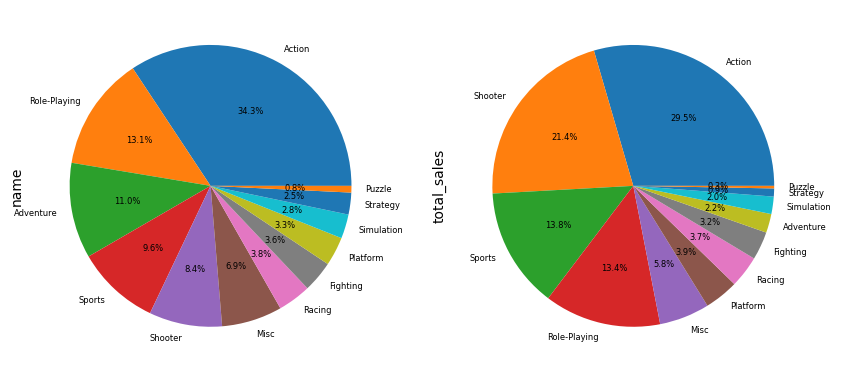

In [66]:
#создазим сводные таблицы - колличество проданых игр и выручка в разрезе по жанрам

genre_sales= actual_data.pivot_table(index='genre',values='total_sales',aggfunc='sum').sort_values(by='total_sales', ascending=False)
genre_amount = actual_data.pivot_table(index='genre',values='name',aggfunc='count').sort_values(by='name', ascending=False)


#построим круговые диаграммы
#на круговых диаграммах в данном случае нам будет удобно оценить 
#и сравнить долю рынка по колличеству выпускаемых игр и по объему продаж 

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,9))
genre_amount.plot(ax=ax1, y='name', kind='pie', figsize = (10,5), legend = False, autopct='%1.1f%%', fontsize = 6)
genre_sales.plot(ax=ax2, y='total_sales', kind='pie', figsize = (10,5), legend = False, autopct='%1.1f%%', fontsize = 6)
plt.show();


**Вывод:**
* в топ-3 жанров по колличеству выпускаемых игр входят экшен, ролевые игры и приключения.
* в конце списка - пазлы, стратегии, симуляторы
* топ-3 по колличеству проданных копий - экшен, спорт и шутеры. 
* последние по прибольности - пазлы, стратегии, симуляторы

* Экшен определенно лидируют на рынке 
* Приключения находятся в топ-3 по выпускаемых игр, но по колличеству продаж всего 2,2%. 
* С Шутерами ситуация наоборот - всего 5 место по колличеству выпускаемых игр, но практически четверть рынка.
* Пазлы, стратегии, симуляторы - это только для ценителей. 



<Figure size 1200x1000 with 0 Axes>

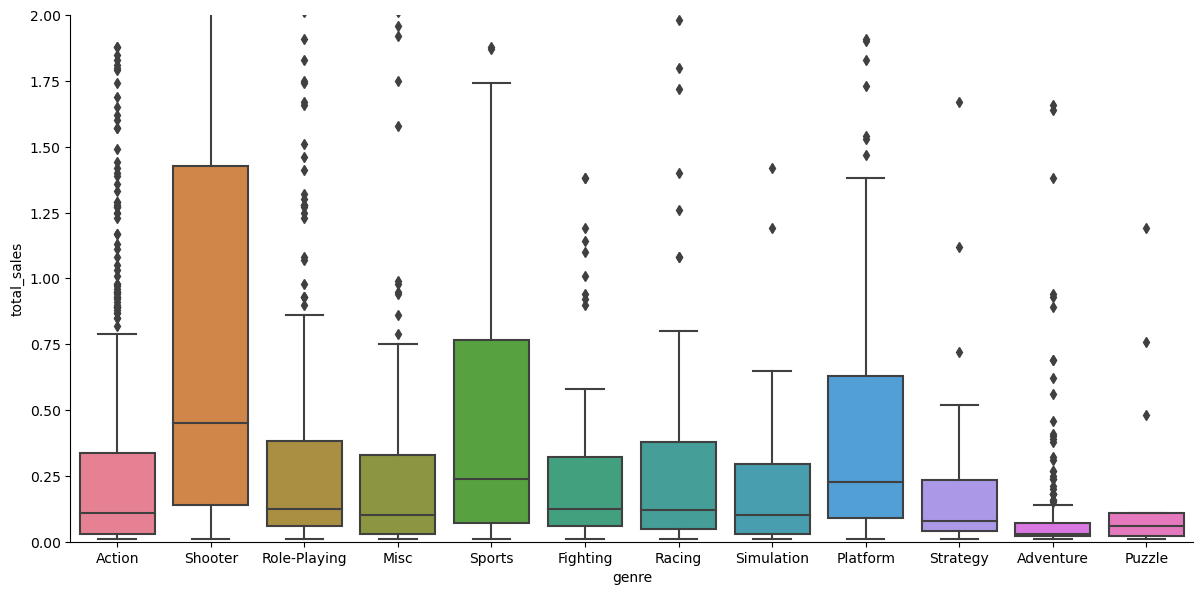

In [43]:
# построим диаграмму размаха по жанрам 
plt.figure(figsize=(12,10))
sns.color_palette("husl", 9)

sns.catplot(data = actual_data,
           x='genre',
           y='total_sales',
           kind = 'box',
           orient='v',
           height=6,
           aspect = 2,
           palette="husl")
plt.ylim (0,2);

**Вывод:**
по суммарным продажам лидировал экшен, но диаграмма размаха показала, что у экшена много выбросов. Это значит только некоторые игры пользуются успехом. 

Лидируют - шутеры. Медиана, больше, чем у остальных жанров. 
Далее идут спортивные и платформеры. 

## Портрет пользователя по регионам

**Задача:**
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Популярные платформы

In [44]:
#Создадим сводную таблицу - продажи по регионам в разрезе платформ

platform_by_region = actual_data.pivot_table(index='platform',values=['na_sales', 'eu_sales','jp_sales'], aggfunc='sum').reset_index()
platform_by_region

,platform,eu_sales,jp_sales,na_sales
0,3DS,30.96,67.81,38.20
1,DS,0.85,0.00,0.57
2,PC,25.36,0.00,11.11
3,PS3,67.81,23.35,63.50
4,PS4,141.09,15.96,108.74
5,PSP,0.17,3.29,0.00
6,PSV,6.10,18.59,5.04
7,Wii,5.93,0.05,6.56
8,WiiU,19.85,10.88,29.21
9,X360,42.52,0.51,81.66


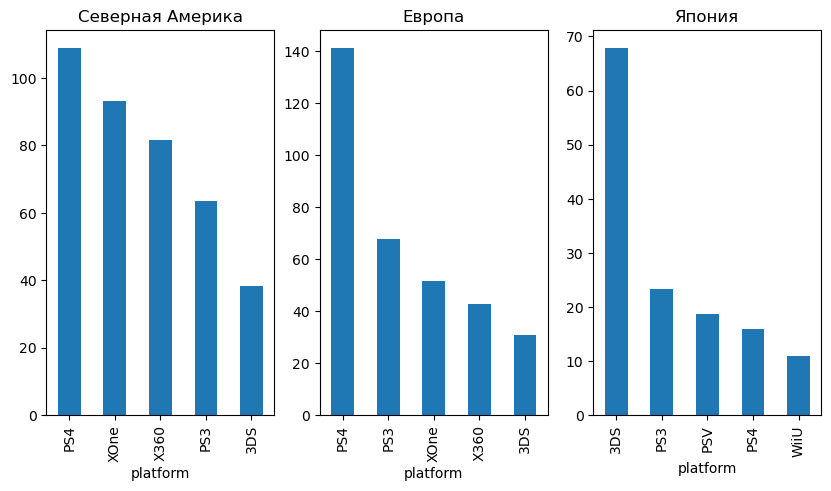

In [45]:
#Построим столбчатые диаграммы для топ-5 жанров каждого региона
#Используем столбчатые диаграммы, чтобы оценить не только топ-5 платформ, но и их продажи

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,6))

#Северная америка
(platform_by_region
 .sort_values(by = 'na_sales',ascending=False)
 .head()
 .plot(ax=ax1,x='platform', y = 'na_sales', kind='bar', figsize = (10,5), legend = False, title ='Северная Америка')
)

#Европа
(platform_by_region
.sort_values(by = 'eu_sales',ascending=False)
.head()
.plot(ax=ax2, x='platform', y = 'eu_sales', kind='bar', figsize = (10,5), legend = False, title ='Европа')
)

#Япония
(platform_by_region
.sort_values(by = 'jp_sales',ascending=False)
.head()
.plot(ax=ax3, x='platform', y = 'jp_sales', kind='bar', figsize = (10,5), legend = False, title ='Япония')
)


plt.show()

**Вывод:**
* В Северной Америке и Европе в топ-5 вошли одни и те же игровые платформы
* В Cеверной Америке платформы от Microsoft популярнее ( 2 и 3 место в списке).
* В Европе больше предпочитают Play Station, 4-я версия лидирует с объемом продаж более 140 мл копий игр, на втором месте те, кто остались верны предыдущей 3-й версии
* В Японии Microsoft не входит в топ-5, здесь больше предпочитают приставки от Nintendo (3ds и WiiU)
* В Японии в топ-5 вошли портативных консолей: WiiU, 3DS, PSV. Причем 3DS занимает первое место. 

### Популярные жанры

In [46]:
#Создадим сводную таблицу - продажи по регионам в разрезе жанров

genre_by_region = actual_data.pivot_table(index='genre',values=['na_sales', 'eu_sales','jp_sales'], aggfunc='sum').reset_index()
genre_by_region

,genre,eu_sales,jp_sales,na_sales
0,Action,118.13,40.49,126.05
1,Adventure,8.25,5.82,7.14
2,Fighting,8.55,7.65,15.55
3,Misc,20.04,9.20,27.49
4,Platform,15.58,4.79,18.14
5,Puzzle,1.00,1.18,0.83
6,Racing,20.19,2.30,12.96
7,Role-Playing,36.97,51.04,46.40
8,Shooter,87.86,6.61,109.74
9,Simulation,10.92,4.52,4.86


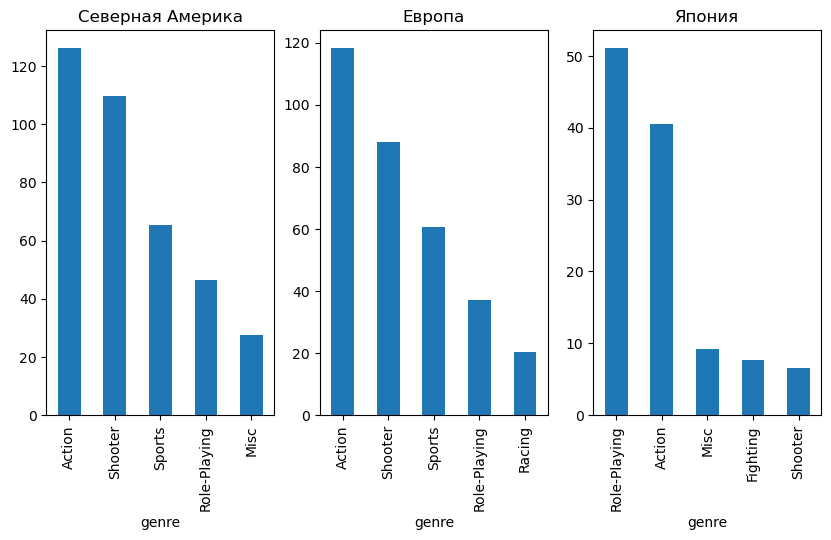

In [47]:
#Построим столбчатые диаграммы для топ-5 жанров каждого региона
#Используем столбчатые диаграммы, чтобы оценить не только топ-5 жанров, но и их продажи

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,6))

#Северная америка
(genre_by_region
 .sort_values(by = 'na_sales',ascending=False)
 .head()
 .plot(ax=ax1,x='genre', y = 'na_sales', kind='bar', figsize = (10,5), legend = False, title ='Северная Америка')
)

#Европа
(genre_by_region
.sort_values(by = 'eu_sales',ascending=False)
.head()
.plot(ax=ax2, x='genre', y = 'eu_sales', kind='bar', figsize = (10,5), legend = False, title ='Европа')
)

#Япония
(genre_by_region
.sort_values(by = 'jp_sales',ascending=False)
.head()
.plot(ax=ax3, x='genre', y = 'jp_sales', kind='bar', figsize = (10,5), legend = False, title ='Япония')
)


plt.show()

**Вывод:** 
* В Европе и Северной Америке в топ-4 распределились одинаково, в северной америке шутеры чуть популярнее. 
* В Северной Америке в топ-5 входит Misk - это все игры, которые не попадают под классификацию, начиная с Guitar Hero и заканчивая играми для малышей. 
* В Европе в топ-5 вошли гонки. 
* Топ-5 Японии сильно отличается: экшен только на втором, его опередили RPG игры ( скорее всего это связано с поп-культурой и аниме), так же в список вошли файтеры. 

### Влияет ли рейтинг ESRB на продажи в отдельном регионе

Посмотрим уникальные значения в столбце рейтинга ESRB за 2013-2014 год. 

In [48]:
actual_data['rating'].unique()

array(['M', nan, 'E', 'T', 'E10+'], dtype=object)

В этом периоде используются только 4 категории:
- "M" - «Для взрослых»
- "E" -  «Для всех»
- "T" - «Подросткам», от 13 лет
- "E10+" - «Для всех от 10 лет и старше»

In [49]:
# построим сводную таблицу, в которой рассчитаем прибыль для каждого рейтинга
rating_ESRB = actual_data.pivot_table(index='rating',values=['na_sales', 'eu_sales','jp_sales'], aggfunc='sum').reset_index()
rating_ESRB

,rating,eu_sales,jp_sales,na_sales
0,E,83.36,15.14,79.05
1,E10+,42.69,5.89,54.24
2,M,145.32,14.11,165.21
3,T,41.95,20.59,49.79


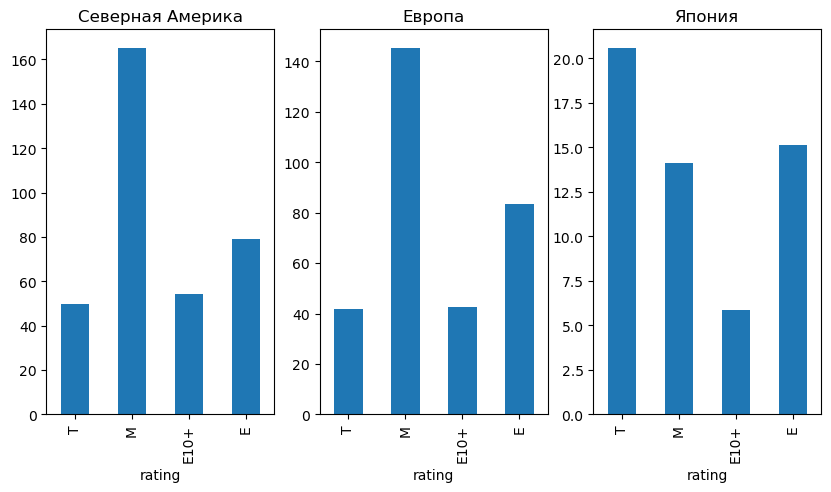

In [50]:
# Построим диаграммы 
# Используем столбчатые диаграммы - у нас всего 4 значения,
# будет удобно сравнивать различные регионы, упорядочив столбцы по названию рейтингов 

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,6))

#Северная америка
(rating_ESRB
 .sort_values(by = 'rating',ascending=False)
 .plot(ax=ax1,x='rating', y = 'na_sales', kind='bar', figsize = (10,5), legend = False, title ='Северная Америка')
)

#Европа
(rating_ESRB
.sort_values(by = 'rating',ascending=False)
.plot(ax=ax2, x='rating', y = 'eu_sales', kind='bar', figsize = (10,5), legend = False, title ='Европа')
)

#Япония
(rating_ESRB
.sort_values(by = 'rating',ascending=False)
.plot(ax=ax3, x='rating', y = 'jp_sales', kind='bar', figsize = (10,5), legend = False, title ='Япония')
)

plt.show()

ESRB - это американо-канадская система. Предположим, что не все игры обращаются за оценкой возрастных ограничений именно туда. Для сравнения посмотри объем продаж игр, где данный рейтинг не указан. 

In [51]:
no_rating = actual_data[actual_data['rating'].isna()]

print('Продажи игр без рейтинга ESRB в Северной Америке', no_rating['na_sales'].sum())
print('Продажи игр без рейтинга ESRB в Европе', no_rating['eu_sales'].sum())
print('Продажи игр без рейтинга ESRB в Японии', no_rating['jp_sales'].sum())

Продажи игр без рейтинга ESRB в Северной Америке 89.42
Продажи игр без рейтинга ESRB в Европе 78.91
Продажи игр без рейтинга ESRB в Японии 85.05


Дополнительно посмотрим, игры без рейтинг. 

In [52]:
no_rating=actual_data[actual_data['rating'].isna()]
no_rating

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


По данным таблицы можно предположить, что большинство игр без рейтинга - это игры локальных разработчиков, или адаптация популярных игр для nintedo. 

**Вывод:**
* Игры с маркировкой "для взрослых" лидируют по продажам в Северной Америке и Европе, на втором и третьем месте игры без рейтинга ESRB и игры "для всех"
* В Японии большая чать продаж приходится на игры, у которых нет рейтинга ESRB, после них идут игры от 13 лет. Как мы предположили - это игры локальных разработчиков, или адаптация популярных игр для nintedo. 


# Проверка гипотез

## Гипотеза 1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза  - это гипотеза о том, что две совокупности, не различаются между собой по сравниваемому признаку, по этому:
* H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

У нас не очень большая выборка и не нужны сверх точные данные - возьмем критический уровень статистической значимости 5%


In [53]:
# создадим переменные для каждой платформы с данными за 2013-2016 год
XOne = actual_data[actual_data['platform'] == "XOne"]['user_score']
PC = actual_data[actual_data['platform'] == "PC"]['user_score']


In [54]:
#используем метод ttest_ind



alpha = 0.05

results = st.ttest_ind(XOne, PC, equal_var = False, nan_policy='omit')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.1475959401343032
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Не получилось отвергнуть нулевую гипотезу, значит средние пользовательские рейтинги платформ Xbox One и PC одинаковые

## Гипотеза 2 - Средние пользовательские рейтинги жанров Action и Sports разные


Нулевая гипотеза  - это гипотеза о том, что две совокупности, не различаются между собой по сравниваемому признаку, по этому:
* H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
* H1: Средние пользовательские рейтинги жанров Action и Sports разные

У нас не очень большая выборка и не нужны сверх точные данные - возьмем критический уровень статистической значимости 5%

In [55]:
# создадим переменные для каждого жанра с данными за 2013-2016 год
#удалим строки с NaN

Action = actual_data[actual_data['genre'] == "Action"]['user_score']
Sports = actual_data[actual_data['genre'] == "Sports"]['user_score']



In [56]:

alpha = 0.05

results = st.ttest_ind(Action, Sports, equal_var = False, nan_policy='omit')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 1.4460039700703482e-20
Отвергаем нулевую гипотезу


 **Вывод:** Отвергаем нулевую гипотезу, значит средние пользовательские рейтинги жанров Action и Sports разные

# Итоговый вывод

**Цель исследования:**
Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Вывод:**
1. К 2017 году пик спроса на видео игры уже прошел, так как появились игры для смартфонов. 
2. Перспективные платформу - PS4 и XOne, они все еще будут в обороте и занимать большую часть рынка.
3. Интерес к видео-играм для PC остается стабильным. 
4. Свою целевую аудиторию и долю рынка имеют портативные консоли. 
5. Самый популярный жанр на рынке - Экшн. Так же стоит обратить внимание на ролевые игры, приключения, спорт и шутеры. 
6. Пазлы, стратегии, симуляторы  - не выгодны для продажи. 
7. При планировании рекламных кампаний не стоит ориентироваться на рейтинги игроков, т.к. высокий рейтинг не означает высокий спрос на игру. Аналогично с рейтингом критиков. 
8. Для разных регионов необходимы разные рекламные кампании, исходя из вкусовых предпочтений целевой аудитории:

 **Северная Америка** 
- популярные платформы: Play Station  3\4, Xbox One\360, 3ds ( по объемама платформы Xbox выигрывают)
- из жанров предпочитают экшен, шутеры, спорт
- популярные игры с рейтингом ESRB:  "для взрослых" и  "для всех". Но есть большая доля популярных игр, у которых нет этого рейтинга.  

 **Европа** 
- популярные платформы: Play Station 3\4, Xbox One\360, 3ds ( по объемама платформы Play Station выигрывают)
- из жанров предпочитают экшен, шутеры, спорт, ролевые и misk
- популярные игры с рейтингом ESRB:  "для взрослых" и  "для всех". Но есть большая доля популярных игр, у которых нет этого рейтинга.  

 **Япония**
- популярные платформы: портативные WiiU, 3DS, PSV, а так же Play Station 3\4
- из жанров предпочитают экшен, шутеры, спорт, ролевые и гонки
- популярные игры с рейтингом ESRB: "13+"
- на первом месте по объему продаж игры, у которых нет рейтинга ESRB. Как мы предположили - это игры локальных разработчиков, или адаптация популярных игр для nintedo. 



